### Load data

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
def test_classification(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    tree = DecisionTreeClassifier().fit(X_train, y_train)
    print(classification_report(y_test, tree.predict(X_test)))

In [35]:
def test_regression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    tree = DecisionTreeRegressor().fit(X_train, y_train)
    print("mse =", mean_squared_error(y_test, tree.predict(X_test)))
    print("mae =", mean_absolute_error(y_test, tree.predict(X_test)))
    print("r2 =", r2_score(y_test, tree.predict(X_test)))

### Clasification

In [36]:
from imblearn.under_sampling import RandomUnderSampler
data_class = pd.read_csv('./data/pred_data_lab_4.csv', index_col=0)
data_class.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,True,True,False,False,False
1,10.829943,0.175592,1.294219,True,False,False,False,False
2,5.091079,0.805153,0.427715,True,False,False,True,False
3,2.247564,5.600044,0.362663,True,True,False,True,False
4,44.190936,0.566486,2.222767,True,True,False,True,False


In [37]:
data_class.shape[1]

8

In [38]:
X_class = data_class.drop(['fraud'], axis=1)
y_class = data_class['fraud']

In [39]:
test_classification(X_class, y_class)

C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtyp

              precision    recall  f1-score   support

       False       1.00      1.00      1.00    164644
        True       1.00      1.00      1.00      7420

    accuracy                           1.00    172064
   macro avg       1.00      1.00      1.00    172064
weighted avg       1.00      1.00      1.00    172064


### Regression

In [40]:
import category_encoders as ce
data_regress = pd.read_csv('./data/pred_data_lab_3.csv', index_col=0)

for column in list(data_regress):
  if data_regress[column].dtype == 'float64':
    valuesNotNAN = data_regress[column].dropna()
    data_regress[column] = data_regress[column].fillna(round(sum(valuesNotNAN)/len(valuesNotNAN)))

bn = ce.BinaryEncoder()
data_regress = bn.fit_transform(data_regress)

data_regress.to_csv("./data/regr_update2.csv")
display(data_regress)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,0,0,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,0,1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,3,1,2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,2,0,63.3,58.0,335,4.34,4.35,2.75
5,0.24,2,2,4,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4,6,1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,6,1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,2,6,1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,3,0,61.0,58.0,2757,6.15,6.12,3.74


In [41]:
data_regress.shape[1]

10

In [42]:
X_regress = data_regress.drop(['carat'], axis=1)
y_regress = data_regress['carat']

In [43]:
test_regression(X_regress, y_regress)

mse = 0.00022335694822888289
mae = 0.007643596730245248
r2 = 0.9890079447267099


C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtyp

### 1. Feature selection

### 1.1 VarianceThreshold

### Classification

In [44]:
from sklearn.feature_selection import VarianceThreshold

In [45]:
X_class.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price
count,860319.000000,860319.000000,860319.000000
mean,16.876511,2.127234,1.435208
std,19.749986,2.987999,1.387652
min,0.004874,0.000118,0.004399
25%,3.671629,0.270919,0.461284
50%,9.159588,0.867934,0.949407
75%,22.035555,2.615014,1.911754
max,102.083308,15.765382,7.196333


In [46]:
vt = VarianceThreshold(2)
X_class_vt = vt.fit_transform(X_class)
print(X_class_vt.shape)
test_classification(X_class_vt, y_class)

(860319, 2)


C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtyp

              precision    recall  f1-score   support

       False       0.96      0.96      0.96    164644
        True       0.05      0.05      0.05      7420

    accuracy                           0.92    172064
   macro avg       0.50      0.50      0.50    172064
weighted avg       0.92      0.92      0.92    172064


### Regression

In [47]:
X_regress.describe()

,cut,color,clarity,depth,table,price,x,y,z
count,45874.000000,45874.000000,45874.000000,45874.000000,45874.00000,45874.000000,45874.000000,45874.000000,45874.000000
mean,3.000763,3.180058,2.058072,61.794254,57.29224,3145.613354,5.572105,5.576332,3.444312
std,1.019494,2.078531,1.518998,1.112414,2.02007,2750.300113,0.978602,0.972853,0.605264
min,0.000000,0.000000,0.000000,58.800000,52.00000,326.000000,3.730000,3.680000,1.410000
25%,2.000000,1.000000,1.000000,61.100000,56.00000,889.000000,4.670000,4.680000,2.880000
50%,3.000000,4.000000,2.000000,61.900000,57.00000,2137.000000,5.570000,5.570000,3.430000
75%,4.000000,5.000000,3.000000,62.500000,59.00000,4688.000000,6.420000,6.420000,3.980000
max,4.000000,6.000000,6.000000,64.700000,63.50000,11883.000000,8.280000,8.270000,5.300000


In [48]:
vt = VarianceThreshold(0.3)
X_regress_vt = vt.fit_transform(X_regress)
print(X_regress_vt.shape)
test_regression(X_regress_vt, y_regress)

(45874, 9)
mse = 0.0002186920980926431
mae = 0.00751934604904634
r2 = 0.9892375157830203


C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtyp

### 1.2 SelectKBest

### Classification

In [49]:
from sklearn.feature_selection import SelectKBest

In [50]:
skb = SelectKBest(k=6)
X_class_skb = skb.fit_transform(X_class, y_class)
test_classification(X_class_skb, y_class)

C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtyp

              precision    recall  f1-score   support

       False       1.00      1.00      1.00    164644
        True       1.00      1.00      1.00      7420

    accuracy                           1.00    172064
   macro avg       1.00      1.00      1.00    172064
weighted avg       1.00      1.00      1.00    172064


In [51]:
X_class_skb = pd.DataFrame(X_class_skb, columns=skb.get_feature_names_out())
X_class_skb

,distance_from_home,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,1.945940,1.0,1.0,0.0,0.0
1,10.829943,1.294219,1.0,0.0,0.0,0.0
2,5.091079,0.427715,1.0,0.0,0.0,1.0
3,2.247564,0.362663,1.0,1.0,0.0,1.0
4,44.190936,2.222767,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...
860314,2.207101,1.626798,1.0,1.0,0.0,0.0
860315,19.872726,2.778303,1.0,1.0,0.0,0.0
860316,2.914857,0.218075,1.0,1.0,0.0,1.0
860317,4.258729,0.475822,1.0,0.0,0.0,1.0


### Regression

In [52]:
skb = SelectKBest(k=1)
X_regress_skb = skb.fit_transform(X_regress, y_regress)
test_regression(X_regress_skb, y_regress)

mse = 0.0003558211566643757
mae = 0.01232942796971031
r2 = 0.982488989697993


C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtyp

In [53]:
X_regress_skb = pd.DataFrame(X_regress_skb, columns=skb.get_feature_names_out())
X_regress_skb

,x
0,3.95
1,3.89
2,4.20
3,4.34
4,3.94
...,...
45869,5.75
45870,5.69
45871,5.66
45872,6.15


### 1.3 RFE

### Classification

In [54]:
from sklearn.feature_selection import RFE

In [55]:
rfe = RFE(estimator=DecisionTreeClassifier().fit(X_class, y_class), n_features_to_select=4, step=1).fit(X_class, y_class)
X_class_rfe = pd.DataFrame(rfe.transform(X_class), columns=rfe.get_feature_names_out())
X_class_rfe

C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtyp

,distance_from_home,ratio_to_median_purchase_price,used_pin_number,online_order
0,57.877857,1.945940,0.0,0.0
1,10.829943,1.294219,0.0,0.0
2,5.091079,0.427715,0.0,1.0
3,2.247564,0.362663,0.0,1.0
4,44.190936,2.222767,0.0,1.0
...,...,...,...,...
860314,2.207101,1.626798,0.0,0.0
860315,19.872726,2.778303,0.0,0.0
860316,2.914857,0.218075,0.0,1.0
860317,4.258729,0.475822,0.0,1.0


In [56]:
test_classification(X_class_rfe, y_class)

C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtyp

              precision    recall  f1-score   support

       False       1.00      1.00      1.00    164644
        True       0.98      0.98      0.98      7420

    accuracy                           1.00    172064
   macro avg       0.99      0.99      0.99    172064
weighted avg       1.00      1.00      1.00    172064


### Regression

In [57]:
tree_regress = DecisionTreeRegressor().fit(X_regress, y_regress)
rfe = RFE(estimator=tree_regress, n_features_to_select=1, step=1).fit(X_regress, y_regress)
X_regress_rfe = pd.DataFrame(rfe.transform(X_regress), columns=rfe.get_feature_names_out())
X_regress_rfe

C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtyp

,x
0,3.95
1,3.89
2,4.20
3,4.34
4,3.94
...,...
45869,5.75
45870,5.69
45871,5.66
45872,6.15


In [58]:
test_regression(X_regress_rfe, y_regress)

mse = 0.0003558211566643757
mae = 0.01232942796971031
r2 = 0.982488989697993


C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtyp

### 2. Feature extraction

### 2.1 PCA

### Classification

In [59]:
from sklearn.decomposition import PCA

In [60]:
pca = PCA(n_components=5)
X_class_pca = pca.fit_transform(X_class, y_class)
X_class_pca.shape

C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


(860319, 5)

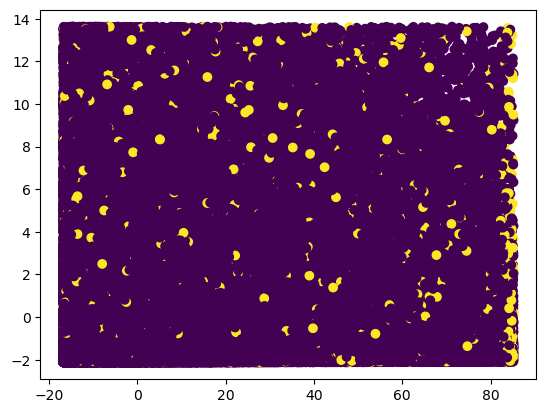

In [61]:
plt.scatter(X_class_pca[:,0], X_class_pca[:,1], c=y_class)

In [62]:
sum(pca.explained_variance_ratio_)

0.9995280859012751

In [63]:
test_classification(X_class_pca, y_class)

              precision    recall  f1-score   support

       False       1.00      1.00      1.00    164644
        True       1.00      1.00      1.00      7420

    accuracy                           1.00    172064
   macro avg       1.00      1.00      1.00    172064
weighted avg       1.00      1.00      1.00    172064


In [64]:
pca_2 = PCA(n_components=7)
X_class_pca_2 = pca_2.fit_transform(X_class, y_class)

C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [65]:
test_classification(X_class_pca_2, y_class)

              precision    recall  f1-score   support

       False       1.00      1.00      1.00    164644
        True       1.00      1.00      1.00      7420

    accuracy                           1.00    172064
   macro avg       1.00      1.00      1.00    172064
weighted avg       1.00      1.00      1.00    172064


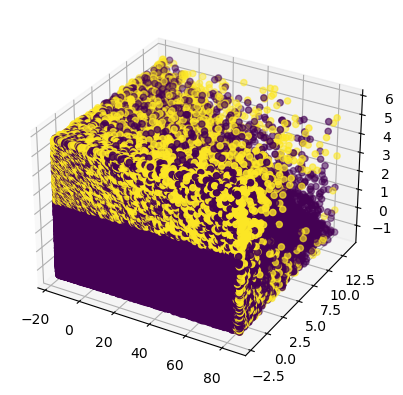

In [66]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_class_pca_2[:,0], X_class_pca_2[:,1], X_class_pca_2[:,2], c=y_class)

### Regression

In [67]:
pca = PCA(n_components=2)
X_regress_pca = pca.fit_transform(X_regress, y_regress)
X_regress_pca.shape

C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


(45874, 2)

In [68]:
test_regression(X_regress_pca, y_regress)

mse = 0.009436904632152588
mae = 0.0685057220708447
r2 = 0.5355820441319317


C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_e

In [69]:
pca_2 = PCA(n_components=3)
X_regress_pca_2 = pca_2.fit_transform(X_regress, y_regress)

C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [70]:
test_regression(X_regress_pca_2, y_regress)

C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


mse = 0.00888999455040872
mae = 0.06638801089918256
r2 = 0.5624971049604301


C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_e

### 2.2 t-SNE

### Classification

In [71]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [ ]:
tsne = TSNE(n_components=2)
X_class_tsne = tsne.fit_transform(X_class)

C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [ ]:
plt.scatter(X_class_tsne[:,0], X_class_tsne[:,1], c=y_class)

In [ ]:
test_classification(X_class_tsne, y_class)

### Regression

In [ ]:
tsne = TSNE(n_components=2)
X_regress_tsne = tsne.fit_transform(X_regress)

In [ ]:
test_regression(X_regress_tsne, y_regress)

### 2.3 Isomap

In [ ]:
from sklearn.manifold import Isomap

### Classification

In [ ]:
isomap = Isomap(n_components=4)
X_class_isomap = isomap.fit_transform(X_class[:10000])

In [ ]:
plt.scatter(X_class_isomap[:,0], X_class_isomap[:,1], c=y_class[:10000])

In [ ]:
test_classification(X_class_isomap, y_class[:10000])

### Regression

In [ ]:
isomap = Isomap(n_components=1)
X_regress_isomap = isomap.fit_transform(X_regress[:15000])

In [ ]:
test_regression(X_regress_isomap, y_regress[:15000])

### Implementation PCA

In [ ]:
import numpy as np

class PCA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        
        self.mean = np.mean(X, axis=0)
        X = X - self.mean

        cov = np.cov(X.T)

        eigenvectors, eigenvalues = np.linalg.eig(cov)
        eigenvectors = eigenvectors.T

        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        self.components = eigenvectors[:self.n_components]

    def transform(self, X):
        
        X = X - self.mean
        return np.dot(X, self.components.T)

In [ ]:
pca = PCA(4)
pca.fit(X_class)
X_new_class = pca.transform(X_class)
plt.scatter(X_new_class[:,0], X_new_class[:,1], c=y_class)

In [ ]:
test_classification(X_new_class, y_class)

### KMeans

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(sample_1, sample_2):
    return np.sqrt(np.sum((sample_1-sample_2)**2))

class KMeans:

    def __init__(self, K=3, max_iters=100):
        
        self.K = K
        self.max_iters = max_iters
        self.clusters = [[] for i in range(self.K)]   # список индексов объектов каждого кластера
        self.centroids = []   #центры кластеров

    def predict(self, X):
        
        self.X = X
        centroids_idxs = np.random.choice(self.X.shape[0], self.K, replace=False) #выбор K различных центров кластеров
        self.centroids = [self.X[i] for i in centroids_idxs]

        for iter in range(self.max_iters):
            
            self.clusters = self.create_clusters(self.centroids)  #назначение объекта к ближайшему центроиду
            centroids_old = self.centroids
            self.centroids = self.new_centroids(self.clusters)  #вычисление новых центроидов
            
            distances = [euclidean_distance(centroids_old[i], self.centroids[i]) for i in range(self.K)]
            if sum(distances) == 0:
                break

        return self.get_predictions(self.clusters)   # получение меток
 
    def get_predictions(self, clusters):
        
        # назначение кластеров объектам
        
        predictions = np.empty(self.X.shape[0])
        for cluster_idx, cluster in enumerate(clusters):
            for idx in cluster:
                predictions[idx] = cluster_idx

        return predictions

    def create_clusters(self, centroids):

        clusters = [[] for i in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self.closest_centroid(sample, centroids)  ## расчет расстояния от объекта до центроидов, выбор min
            clusters[centroid_idx].append(idx)
        return clusters

    def closest_centroid(self, sample, centroids):
        
        #определение расстояние от объекта до каждого центроида
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx

    def new_centroids(self, clusters):
        
        # расчет среднего значения
        centroids = np.zeros((self.K, self.X.shape[1]))
        for cluster_idx, cluster in enumerate(clusters):
            mean_value_cluster = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = mean_value_cluster
        return centroids

In [ ]:
k = KMeans(K=2, max_iters=100)
y_pred = k.predict(X_new_class)
plt.scatter(X_new_class[:,0], X_new_class[:,1], c=y_pred)

In [ ]:
test_classification(X_new_class, y_class)

### Ridge

In [ ]:
class MyRidge:
    def __init__( self, learning_rate, iterations, alpha ) :
        self.learning_rate = learning_rate        
        self.iterations = iterations        
        self.alpha = alpha

    def transform_(self, x):
        return np.concatenate((np.ones((len(x), 1)), x), axis = 1)

    def loss_func(self, x, y, w):
        return sum(y - np.dot(x, w)) ** 2  + self.alpha * (np.matmul(w, w))/x.shape[0]

    def fit(self, x, y):
        dist = np.inf
        eps = 1e-20
        X = self.transform_(x)

        w = np.zeros(X.shape[1])
        iter = 0

        while iter <= self.iterations:
            loss = self.loss_func(X, y, w)
            w = w - ((self.learning_rate * 2 * np.dot(X.T, np.dot(X, w) - y)) + ( 2 * self.alpha * w ))/X.shape[0]
            dist = np.abs(loss - self.loss_func(X, y, w))
            iter += 1
            
            if(dist <= eps):
                break
        print(iter)
        self.w = w
        return self
        

    def predict(self, x):
        return np.dot(self.transform_(x), self.w)

In [ ]:
df = pd.read_csv("../data/regression/trip_duration_update.csv", index_col=0)
df = df.head(150000)
df.info()

In [ ]:
y = df['trip_duration']
X = df.drop(['trip_duration'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train_std = pd.DataFrame(standardScaler.transform(X_train), columns=X.columns)
X_test_std = pd.DataFrame(standardScaler.transform(X_test), columns=X.columns)
X_train_std.describe()

In [ ]:
ridge = MyRidge(0.01, 5000, 0.9)
model = ridge.fit(X_train_std, y_train)
y_pred = ridge.predict(X_test_std)
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'R^2: {r2_score(y_test, y_pred)}')

In [ ]:
print(ridge.w)